## Sensitivity Analysis 
In this section, we report how different decisions made during the analysis impact the accuracy of CNN models predeicting map patches $\vec{\tilde{m}}$ from satellite image patches $\vec{s}$.

### Sensitivity to  Amount of Training Examples

Cutting the Masachussets building dataset into patches using different sliding window and building distribution in any given patch yields different results. There is a performance gain as we reduce the sliding window as seen in the figures below. The plots are generated using training patches generated with sliding windows $16$, $32$ and $64$. The size of each patch is $64 \times 64$ and there is no patch without building pixels. A possible explanation to why models trained on patches produced using sliding window of $16$ performs better than sliding window $32$ is that more training examples are produced using sliding window $16$ compared to $32$. Since there are millions of parameters in the network, it will take a large amount of training examples to successfully tune the parameters without overfitting the validation sets. Another possible reason is that the correlation between any two neighbouring patches in the training set produces using sliding window $16$ is greater than the case where bigger sliding window is used.

The blue, red and green curve (first figure) represent the precision-recall curve of a shallow CNN model trained with examples produced using sliding windows $16$, $32$ and $64$ respectively. 

The shallow CNN architecture used in this particular experiment consists of 2 convolutional hidden layers. The input to the model is a $64$ by $64$ aerial image patch. The first hidden layer is a convolution layer with $64$ $9 \times 9$ filters with stride $2$. The second hidden layer is also a convolutional layer with $128$ filters of size $5 \times 5$ with stride $1$. All two hidden layers consist of rectified linear units.The output layer is a fully-connected layer of 4096 sigmoid units.

The network was trained using stochastic gradient descent with minibatches of size $32$ with $0.05$ learning rate and $0.9$ momentum. The loss function used binary cross entropy.

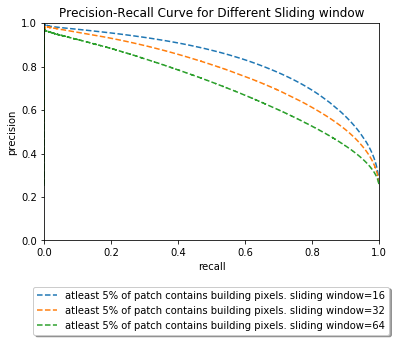

In [8]:
plt.plot(rec4, prec4, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=16')
plt.plot(rec5, prec5, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=32')
plt.plot(rec6, prec6, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=64')

plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve for Different Sliding window")
plt.xlim(0, 1, 0.2)
plt.ylim(0, 1, 0.2)
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/prplot_dist_5_sw_16_32_64.png')

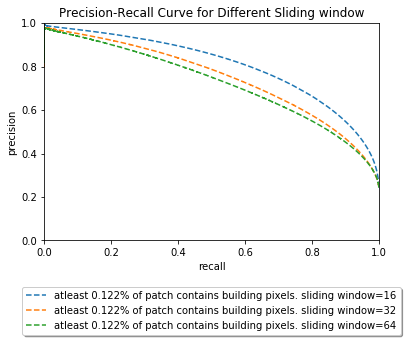

In [6]:
plt.plot(rec1, prec1, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=16')
plt.plot(rec2, prec2, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=32')
plt.plot(rec3, prec3, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=64')
#plt.plot(rec4, prec4, '', label='atleast 10% of patch contains building pixels')
#plt.plot(rec5, prec5, '', label='5 building pixels in patch with sliding window 32')
#plt.plot(rec6, prec6, '', label='5 building pixels in patch with sliding window 16')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve for Different Sliding window")
plt.xlim(0, 1, 0.2)
plt.ylim(0, 1, 0.2)
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/prplot_dist_0.122%_sw_16_32_64.png')

### Sensitivity to Number of Epochs

We observed a gain in performance across epochs as shown in the figure below. However, using early stopping as regularizer, the number of epochs attained before the the model start to overfit the validation set is sensitive to the amount of training examples and the sliding window used to prepare the training examples.

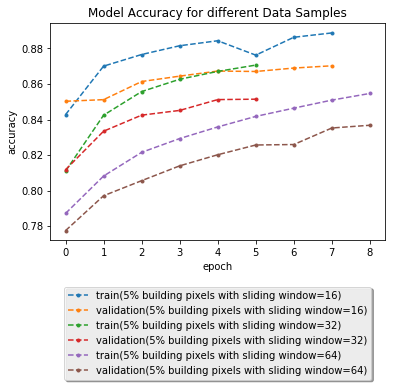

In [34]:
plt.plot(acc4, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=16)')
plt.plot(val_acc4, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=16)')

plt.plot(acc5, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=32)')
plt.plot(val_acc5, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=32)')

plt.plot(acc6, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=64)')
plt.plot(val_acc6, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=64)')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model Accuracy for different Data Samples")
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/acplot_dist_5%_sw_16_32_64.png')
#plt.xlim(0, 4, 0.2)
#plt.ylim(0, 1, 0.01)

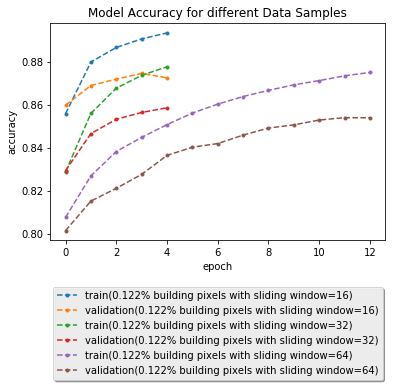

In [33]:
plt.plot(acc1, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=16)')
plt.plot(val_acc1, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=16)')

plt.plot(acc2, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=32)')
plt.plot(val_acc2, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=32)')

plt.plot(acc3, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=64)')
plt.plot(val_acc3, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=64)')

plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model Accuracy for different Data Samples")
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/acplot_dist_0.122%_sw_16_32_64.png')
#plt.xlim(0, 4, 0.2)
#plt.ylim(0, 1, 0.01)

### Replicating Mnih's thesis

In the following analysis, we turn attention to evaluating the model trained using our implementation of Mnih's architecture.
As our shallow architecture, the input to the model is a $64$ by $64$ aerial image patch. The first
hidden layer is a convolution layer with $64$ $16 \times 16$ filters with stride $4$. It is followed
by $2 \times 2$ max pooling with stride $1$. The second hidden layer is also convolutional
with $112$ filters of size $4 \times 4$ with stride $1$, followed by a third convolutional layer with $80$ filters of size $3 \times 3$ with stride $1$. The fourth, and final, hidden layer is a fully connected layer with $4096$ hidden units. All four hidden layers consist of rectified linear units. As before, the output layer is a fully-connected layer of $256$ sigmoid units.

We trained the same model architecture with different amount of training examples using sliding windows similar to our shallow architecture. One other difference between Mnih's model and our's aside the depth of the architecture is that while our model learns to predict $64$ by $64$ map patch from aerial image patch, Mnih's learns to predict $16$ by $16$ map patch.

In later section, we investigate the sensitivity of Mnih's model and our's to learning different predicted map patch sizes from aerial image patch..

In [2]:
from evaluation import *

In [3]:
f = open('/home/kolaleye/lustre/onitemi/data2/working/train_data/patches_dist_1_sw_16/22678915_15_64.pickle', 'rb')
train_data = pickle.load(f)
g = open('/home/kolaleye/lustre/onitemi/data2/working/train_data/patches_dist_1_sw_16/23429020_15_64.pickle', 'rb')
test_data = pickle.load(g)

def get_image(dataset, i=0):
    rgb_image=dataset['features'][i][0]
    label=dataset['labels'][i][0]
    test=rgb_image.reshape((1,64,64,3))
    return test,label,rgb_image

test_image, test_label, _ = get_image(test_data, 400)
train_image, train_label, _ = get_image(train_data, 400)

In [9]:
import keras
class params():
    def __init__(self, model_id):
        self.architecture='one_layer'
        self.patch_size=64
        #self.model_id='27_09_2017_1008_sentinel_one_layer'
        #self.model_id = '07_10_2017_1957_sentinel_one_layer'
        #self.model_id = '16_10_2017_1946_sentinel_one_layer'
        #self.model_id = '19_10_2017_1034_sentinel_one_layer'
        #self.model_id = '09_01_2018_1343_sentinel_mnih'
        self.model_id = model_id
        self.model_dir="/home/kolaleye/lustre/onitemi/data2/working/models/"
        self.out_format="GeoTIFF"
        
    def load_model(self):
        """ Load a keras model and its weights with the given ID """
        
        model_dir = os.path.join(self.model_dir, self.model_id)

        print("Load model in {}.".format(model_dir))
        model_file = os.path.join(model_dir, "model.json")
        with open(model_file, "r") as f:
            json_file = f.read()
            model = keras.models.model_from_json(json_file)

        weights_file = os.path.join(model_dir, "weights.hdf5")
        model.load_weights(weights_file)

        return model

In [26]:
model_1 = params('05_01_2018_1443_sentinel_mnih')
model_2 = params('06_01_2018_1823_sentinel_mnih')
model_3 = params('07_01_2018_1302_sentinel_mnih')
model_4 = params('08_01_2018_1423_sentinel_mnih')
model_5 = params('09_01_2018_1346_sentinel_mnih')
model_6 = params('12_01_2018_1527_sentinel_mnih')
model_7 = params('13_01_2018_2118_sentinel_mnih')
model_8 = params('14_01_2018_1631_sentinel_mnih')
#model_9 = params('15_01_2018_0845_sentinel_mnih')

In [27]:
model_1 = model_1.load_model()
model_2 = model_2.load_model()
model_3 = model_3.load_model()
model_4 = model_4.load_model()
model_5 = model_5.load_model()
model_6 = model_6.load_model()
model_7 = model_7.load_model()
model_8 = model_8.load_model()
#model_9 = model_9.load_model()

Load model in /home/kolaleye/lustre/onitemi/data2/working/models/05_01_2018_1443_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/06_01_2018_1823_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/07_01_2018_1302_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/08_01_2018_1423_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/09_01_2018_1346_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/12_01_2018_1527_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/13_01_2018_2118_sentinel_mnih.
Load model in /home/kolaleye/lustre/onitemi/data2/working/models/14_01_2018_1631_sentinel_mnih.


In [28]:
from keras.utils import plot_model
from keras.models import Model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [38]:
layers = ['conv2d_1', 'conv2d_2', 'conv2d_3', 'dense_1', 'dense_2']
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

In [42]:
l_pred = []
for i in layers:
    layer_out = Model(inputs=model_1.input, outputs=model_1.get_layer(i).output)
    l_out = layer_out.predict(test_image)
    l_pred.append(l_out)

In [43]:
for i in range(len(layers)):
    print('{}_shape = {}:'.format(layers[i], l_pred[i].shape))


conv2d_1_shape = (1, 16, 16, 64):
conv2d_2_shape = (1, 16, 16, 112):
conv2d_3_shape = (1, 16, 16, 80):
dense_1_shape = (1, 4096):
dense_2_shape = (1, 256):


### Visualization of the different layers 

In [44]:
%matplotlib inline

## Model_1 
Model_1 is trained using aerial image patches generated by applying a sliding window of $64$ on $1500$ by $1500$  aerial image. For the corresponding labels, we used all map patches in this case for training. 

### First Hidden Layer: Convolutional Layer
The CNN architecture is a hierarchical framework. Each layer learns different abstraction of the input image patch and outputs activation maps fed into the next layer to learn the next level of abstraction from the input image. The first hidden layer learns low-level abstractions like horizontal and vertical lines. The lines are combined together in the next layer to abstract corners and edges from the input aerial image patch.

In this case, the first hidden layer which is a convolutional layer with $64$ $16 \times 16$ filters with stride $4$ is immediately followed by  $2 \times 2$  max pooling with stride  $1$

The figure below gives $64$ activation maps of the first hidden convolutional layer. The activation maps are fed into max-pooling function.

f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[0][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

### Second Hidden Layer: Convolutional Layer
The second hidden layer is also a convolutional layer with $112$ filters of size $4 \times 4$ with stride $1$. The figure below gives $64$ activation maps of the second hidden layer.

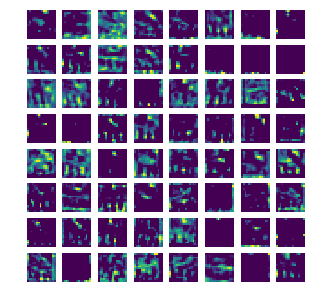

In [46]:
f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[1][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

### Third Hidden Layer: Convolutional Layer
The second hidden layer is followed by a third convolutional layer with $80$ filters of size $3 \times 3$ with stride $1$. The figure below gives $64$ activation maps of the third hidden layer.

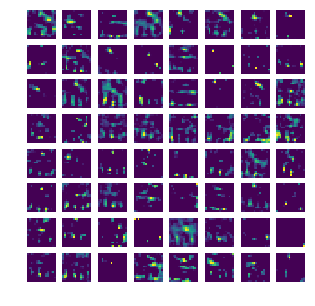

In [47]:
f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[2][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

### Fourth Hidden Layer: Fully-connected Layer



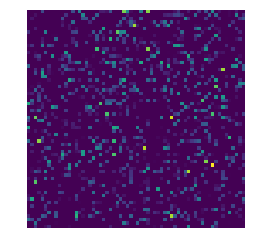

In [48]:
plt.imshow(l_pred[3].reshape((64,64)))
plt.axis('off')
plt.grid('off')

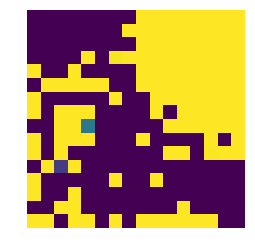

In [49]:
plt.imshow(l_pred[4].reshape((16,16)))
plt.axis('off')
plt.grid('off')

### Second Hidden Layer: Convolutional Layer


In [50]:
l_pred = []
for i in layers:
    layer_out = Model(inputs=model_2.input, outputs=model_2.get_layer(i).output)
    l_out = layer_out.predict(test_image)
    l_pred.append(l_out)

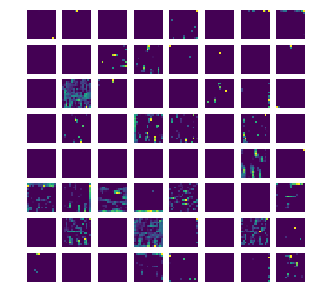

In [52]:
f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[0][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

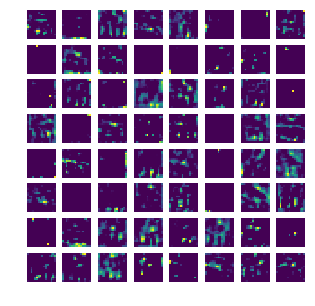

In [53]:
f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[1][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

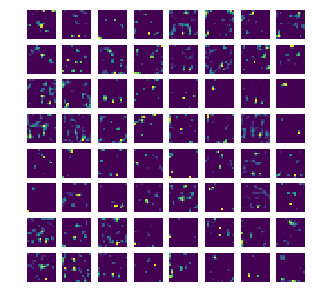

In [54]:
f, axarr = plt.subplots(8, 8, figsize=(5,5))
k=0
for i in range(8):
    for j in range(8):
        axarr[i, j].imshow(l_pred[2][0,:,:,k])
        axarr[i,j].axis('off')
        #axarr[i, j].set_title("'m'")
        if k < 64:
            k+=1

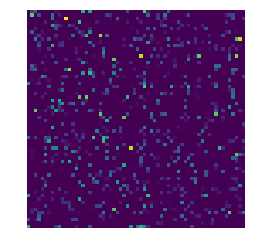

In [56]:
plt.imshow(l_pred[3].reshape((64,64)))
plt.axis('off')
plt.grid('off')

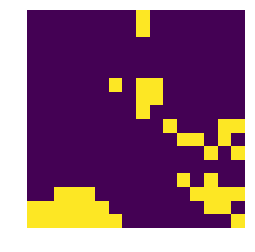

In [58]:
plt.imshow(l_pred[4].reshape((16,16)))
plt.axis('off')
plt.grid('off')

A combination of all predicted patches and an overlay of the predicted maps on the aerial image

![](/home/kolaleye/lustre/onitemi/data2/output/05_01_2018_1443_sentinel_mnih/22828930_15_results.tif)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
#history data for 0.122% distribution
history1 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/22_10_2017_1351_sentinel_one_layer/history.pickle', 'rb')) #sw=16
history2 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/23_10_2017_0931_sentinel_one_layer/history.pickle', 'rb')) #sw=32
history3 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/23_10_2017_1405_sentinel_one_layer/history.pickle', 'rb')) #sw=64

#history data for 5% distribution
history4 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/06_11_2017_1807_sentinel_one_layer/history.pickle', 'rb')) #sw=16
history5 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/07_11_2017_1446_sentinel_one_layer/history.pickle', 'rb')) #sw=32
history6 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/08_11_2017_0841_sentinel_one_layer/history.pickle', 'rb')) #sw=64

#history data for 10% distribution
history7 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/14_12_2017_1310_sentinel_one_layer/history.pickle', 'rb')) #sw=16
history8 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/15_12_2017_0851_sentinel_one_layer/history.pickle', 'rb')) #sw=32
history9 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/15_12_2017_1415_sentinel_one_layer/history.pickle', 'rb')) #sw=64


In [3]:
#prec-recall data for 0.122% distribution
pr1 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/22_10_2017_1351_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=16
pr2 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/23_10_2017_0931_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=32
pr3 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/23_10_2017_1405_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=64

#prec-recall data for 5% distribution
pr4 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/06_11_2017_1807_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=16
pr5 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/07_11_2017_1446_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=32
pr6 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/08_11_2017_0841_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=64

#prec-recall data for 10% distribution
pr7 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/14_12_2017_1310_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=16
pr8 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/15_12_2017_0851_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=32
pr9 = pickle.load(open('/home/kolaleye/lustre/onitemi/data/output/15_12_2017_1415_sentinel_one_layer/precision_recall.pickle', 'rb')) #sw=64

In [4]:
# dist=0.122%, sw=16
prec1 = pr1['precision']
rec1 = pr1['recall']  
# dist=0.122%, sw=32
rec2 = pr2['recall']  
prec2 = pr2['precision']
# dist=0.122%, sw=64
rec3 = pr3['recall']  
prec3 = pr3['precision']
# dist=5%, sw=16
rec4 = pr4['recall']  
prec4 = pr4['precision']
# dist=5%, sw=32
rec5 = pr5['recall']  
prec5 = pr5['precision']
# dist=5%, sw=64
rec6 = pr6['recall']  
prec6 = pr6['precision']
# dist=10%, sw=16
rec7 = pr7['recall']  
prec7 = pr7['precision']
# dist=10%, sw=32
rec8 = pr8['recall']  
prec8 = pr8['precision']
# dist=10%, sw=64
rec9 = pr9['recall']  
prec9 = pr9['precision']

In [5]:
# dist=0.122%, sw=16
acc1 = history1['acc']
val_acc1 = history1['val_acc']
# dist=0.122%, sw=32
acc2 = history2['acc']
val_acc2 = history2['val_acc']
# dist=0.122%, sw=64
acc3 = history3['acc']
val_acc3 = history3['val_acc']
# dist=5%, sw=16
acc4 = history4['acc']
val_acc4 = history4['val_acc']
# dist=5%, sw=32
acc5 = history5['acc']
val_acc5 = history5['val_acc']
# dist=5%, sw=64
acc6 = history6['acc']
val_acc6 = history6['val_acc']
# dist=10%, sw=16
acc7 = history7['acc']
val_acc7 = history7['val_acc']
# dist=10%, sw=32
acc8 = history8['acc']
val_acc8 = history8['val_acc']
# dist=10%, sw=64
acc9 = history9['acc']
val_acc9 = history9['val_acc']

### Precision-recall Plot of dist=0.122%, sliding windows: 16, 32 and 64

### Precision-recall Plot of dist=0.122%, 5%, 10%, 20% and sliding windows: 16, 32 and 64

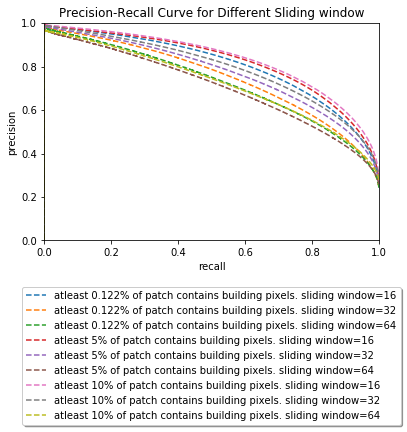

In [7]:
plt.plot(rec1, prec1, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=16')
plt.plot(rec2, prec2, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=32')
plt.plot(rec3, prec3, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=64')
plt.plot(rec4, prec4, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=16')
plt.plot(rec5, prec5, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=32')
plt.plot(rec6, prec6, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=64')
plt.plot(rec7, prec7, '', linestyle='dashed', label='atleast 10% of patch contains building pixels. sliding window=16')
plt.plot(rec8, prec8, '', linestyle='dashed', label='atleast 10% of patch contains building pixels. sliding window=32')
plt.plot(rec9, prec9, '', linestyle='dashed', label='atleast 10% of patch contains building pixels. sliding window=64')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve for Different Sliding window")
plt.xlim(0, 1, 0.2)
plt.ylim(0, 1, 0.2)
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/prplot_dist_0.122%_5%_10%_sw_16_32_64.png')

### Precision-recall plot of dist=5%, sliding windows: 16, 32 and 64 

### Precision-recall Plot of dist=0.122%, 5%, 10%, 20% and sliding windows: 16

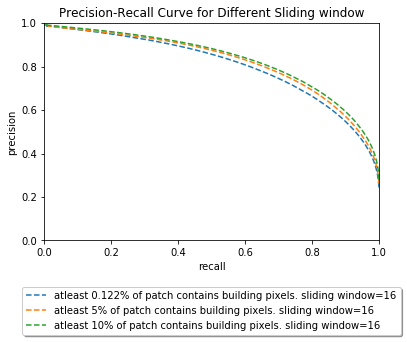

In [9]:
plt.plot(rec1, prec1, '', linestyle='dashed', label='atleast 0.122% of patch contains building pixels. sliding window=16')
plt.plot(rec4, prec4, '', linestyle='dashed', label='atleast 5% of patch contains building pixels. sliding window=16')
plt.plot(rec7, prec7, '', linestyle='dashed', label='atleast 10% of patch contains building pixels. sliding window=16')
plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve for Different Sliding window")
plt.xlim(0, 1, 0.2)
plt.ylim(0, 1, 0.2)
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/prplot_0.122%_5%_10%_16.png')

### Accuracy Plot of dist=0.122%, 5%, 10%, 20% sliding windows: 16

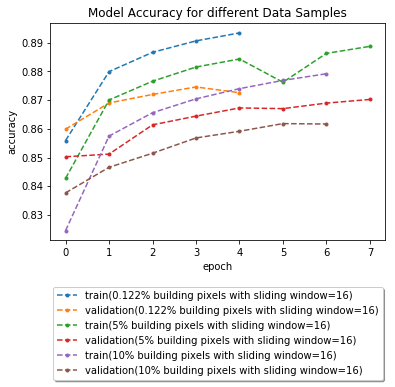

In [10]:
plt.plot(acc1, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=16)')
plt.plot(val_acc1, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=16)')

plt.plot(acc4, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=16)')
plt.plot(val_acc4, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=16)')

plt.plot(acc7, '', linestyle='dashed', marker='.', label='train(10% building pixels with sliding window=16)')
plt.plot(val_acc7, '', linestyle='dashed', marker='.', label='validation(10% building pixels with sliding window=16)')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model Accuracy for different Data Samples")
plt.savefig('/home/kolaleye/lustre/onitemi/data/output/acplot_0.122%_5%_10%_16.png')
#plt.xlim(0, 4, 0.2)
#plt.ylim(0, 1, 0.01)

### Accuracy Plot of dist=0.122%, sliding windows: 16, 32, 64

### Accuracy Plot of dist=5%, sliding windows: 16, 32, 64

### Accuracy Plot of dist=0.122%, 5%, 10% and 20%, sliding windows: 16, 32, 64 

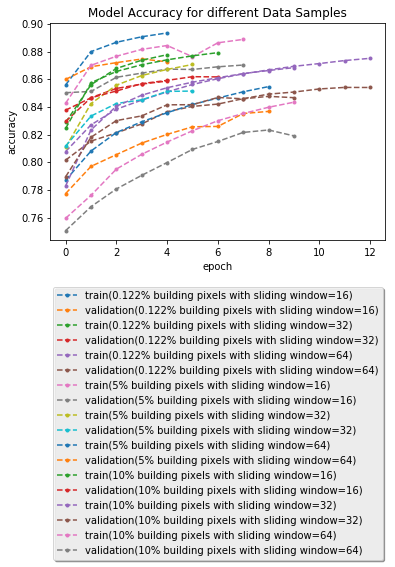

In [70]:
plt.plot(acc1, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=16)')
plt.plot(val_acc1, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=16)')

plt.plot(acc2, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=32)')
plt.plot(val_acc2, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=32)')

plt.plot(acc3, '', linestyle='dashed', marker='.', label='train(0.122% building pixels with sliding window=64)')
plt.plot(val_acc3, '', linestyle='dashed', marker='.', label='validation(0.122% building pixels with sliding window=64)')

plt.plot(acc4, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=16)')
plt.plot(val_acc4, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=16)')

plt.plot(acc5, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=32)')
plt.plot(val_acc5, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=32)')

plt.plot(acc6, '', linestyle='dashed', marker='.', label='train(5% building pixels with sliding window=64)')
plt.plot(val_acc6, '', linestyle='dashed', marker='.', label='validation(5% building pixels with sliding window=64)')

plt.plot(acc7, '', linestyle='dashed', marker='.', label='train(10% building pixels with sliding window=16)')
plt.plot(val_acc7, '', linestyle='dashed', marker='.', label='validation(10% building pixels with sliding window=16)')

plt.plot(acc8, '', linestyle='dashed', marker='.', label='train(10% building pixels with sliding window=32)')
plt.plot(val_acc8, '', linestyle='dashed', marker='.', label='validation(10% building pixels with sliding window=32)')

plt.plot(acc9, '', linestyle='dashed', marker='.', label='train(10% building pixels with sliding window=64)')
plt.plot(val_acc9, '', linestyle='dashed', marker='.', label='validation(10% building pixels with sliding window=64)')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model Accuracy for different Data Samples")
#plt.xlim(0, 4, 0.2)
#plt.ylim(0, 1, 0.01)